## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd


## Accessing the dataset from the csv file

In [2]:
df=pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Checking for the missing values

In [3]:
df.isnull().sum() # 0 indicates there are no missing values and 1 indicates that olumn has some missing values

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


# Checking datatypes of the columns


In [4]:
# Checking the format for date-time and other columns like Unit price, Quantity and Total
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


# **One hot encoding** ->converts categorical data into binary vectors

In [5]:
# Include all relevant categorical columns for one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Branch', 'Gender', 'Payment', 'City', 'Customer type', 'Product line'])

# Save the encoded DataFrame to a CSV file
df_encoded.to_csv('supermarket_sales_encoded.csv', index=False)

# Read the encoded DataFrame
df_encoded = pd.read_csv('/content/supermarket_sales_encoded.csv')
# Display the first few rows of the encoded DataFrame
df_encoded.head()


,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,...,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,750-67-8428,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,...,False,True,True,False,False,False,False,True,False,False
1,226-31-3081,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,...,True,False,False,True,True,False,False,False,False,False
2,631-41-3108,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,...,False,True,False,True,False,False,False,False,True,False
3,123-19-1176,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,...,False,True,True,False,False,False,False,True,False,False
4,373-73-7910,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,...,False,True,False,True,False,False,False,False,False,True


## **Feature engineering** -> extracting importance features such as year, month, dayofweek, from the "Date" column as it helps capture temporal patterns and seasonality that improves the model's predictive accuracy.



In [6]:
# Extract year, Month, and Day of the week from the "Date" column
df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
df_encoded['Year']=df_encoded['Date'].dt.year
df_encoded['Month']=df_encoded['Date'].dt.month
df_encoded['DayOfWeek']=df_encoded['Date'].dt.dayofweek
# droping the original date column
# df_encoded=df_encoded.drop('Date',axis=1)

In [ ]:
df_encoded.head()

,Invoice ID,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,...,Branch_B,Branch_C,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,Year,Month,DayOfWeek
0,750-67-8428,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,...,False,False,True,False,False,False,True,2019,1,5
1,226-31-3081,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,...,False,True,True,False,True,False,False,2019,3,4
2,631-41-3108,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,...,False,False,False,True,False,True,False,2019,3,6
3,123-19-1176,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,...,False,False,False,True,False,False,True,2019,1,6
4,373-73-7910,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,...,False,False,False,True,False,False,True,2019,2,4


## **Scaling** -> Scaling normalizes the data to a range between 0 and 1, ensuring that no feature dominates due to its scale.

In [7]:
# Scaling the numerical features Unit price, Quantity and Total
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical_columns=['Unit price','Quantity','Total']
df_encoded[numerical_columns]=scaler.fit_transform(df_encoded[numerical_columns])
df_encoded[numerical_columns].head()

,Unit price,Quantity,Total
0,0.718847,0.666667,0.521616
1,0.057855,0.444444,0.067387
2,0.403316,0.666667,0.319628
3,0.535603,0.777778,0.463549
4,0.848131,0.666667,0.604377


## **Outliers detections** -> It helps identify extreme values (with Z-scores above a threshold).

In [8]:
from scipy.stats import zscore
df_encoded['Z-score']=zscore(df_encoded['Total'])
thresold=2.75
outliers=df_encoded[np.abs(df_encoded['Z-score'])> thresold]
print(outliers)

      Invoice ID  Unit price  Quantity  Tax 5%     Total       Date   Time  \
166  234-65-2137    0.951268       1.0  47.790  0.962150 2019-01-16  13:32   
167  687-47-8271    0.989097       1.0  49.490  0.996744 2019-02-08  16:20   
350  860-79-0874    0.992657       1.0  49.650  1.000000 2019-02-15  14:53   
357  554-42-2417    0.949711       1.0  47.720  0.960726 2019-01-09  13:45   
422  271-88-8734    0.969404       1.0  48.605  0.978735 2019-02-08  13:00   
557  283-26-5248    0.983979       1.0  49.260  0.992064 2019-01-30  20:23   
699  751-41-9720    0.972630       1.0  48.750  0.981686 2019-01-12  16:18   
792  744-16-7898    0.971184       1.0  48.685  0.980363 2019-01-15  13:48   
996  303-96-2227    0.971295       1.0  48.690  0.980465 2019-03-02  17:16   

      cogs  gross margin percentage  gross income  ...  \
166  955.8                 4.761905        47.790  ...   
167  989.8                 4.761905        49.490  ...   
350  993.0                 4.761905        49

## **Outliers removal** -> Outlier removal using the Z-score helps eliminate extreme values (with Z-scores above a threshold) to improve model accuracy and prevent skewed results.

In [9]:
# Remove rows where Z-score is greater than 2.75
df_ecleaned = df_encoded[np.abs(df_encoded['Z-score']) <= 2.75]


## Checking if the columns with outliers are present or not


In [10]:
#ensuring if the datasets are without outliers
thresold=2.75
outliers=df_ecleaned[np.abs(df_ecleaned['Z-score'])> thresold]
print(outliers)

Empty DataFrame
Columns: [Invoice ID, Unit price, Quantity, Tax 5%, Total, Date, Time, cogs, gross margin percentage, gross income, Rating, Branch_A, Branch_B, Branch_C, Gender_Female, Gender_Male, Payment_Cash, Payment_Credit card, Payment_Ewallet, City_Mandalay, City_Naypyitaw, City_Yangon, Customer type_Member, Customer type_Normal, Product line_Electronic accessories, Product line_Fashion accessories, Product line_Food and beverages, Product line_Health and beauty, Product line_Home and lifestyle, Product line_Sports and travel, Year, Month, DayOfWeek, Z-score]
Index: []

[0 rows x 34 columns]


## Creating a csv file with cleaned dataset

In [11]:
df_ecleaned.to_csv('cleaned_dataset.csv', index=False)
df_ec=pd.read_csv('cleaned_dataset.csv')
df_ec.set_index('Date',inplace=True)
df_ec.index
df_ec.head()

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,...,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Year,Month,DayOfWeek,Z-score
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,0.718847,0.666667,26.1415,0.521616,13:08,522.83,4.761905,26.1415,9.1,...,False,False,False,True,False,False,2019,1,5,0.919607
2019-03-08,226-31-3081,0.057855,0.444444,3.8200,0.067387,10:29,76.40,4.761905,3.8200,9.6,...,True,False,False,False,False,False,2019,3,4,-0.987730
2019-03-03,631-41-3108,0.403316,0.666667,16.2155,0.319628,13:23,324.31,4.761905,16.2155,7.4,...,False,False,False,False,True,False,2019,3,6,0.071446
2019-01-27,123-19-1176,0.535603,0.777778,23.2880,0.463549,20:33,465.76,4.761905,23.2880,8.4,...,False,False,False,True,False,False,2019,1,6,0.675780
2019-02-08,373-73-7910,0.848131,0.666667,30.2085,0.604377,10:37,604.17,4.761905,30.2085,5.3,...,False,False,False,False,False,True,2019,2,4,1.267125


## Visualizing the dataset with different graphs

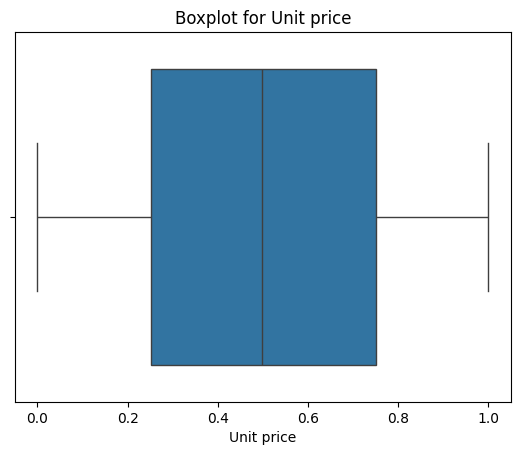

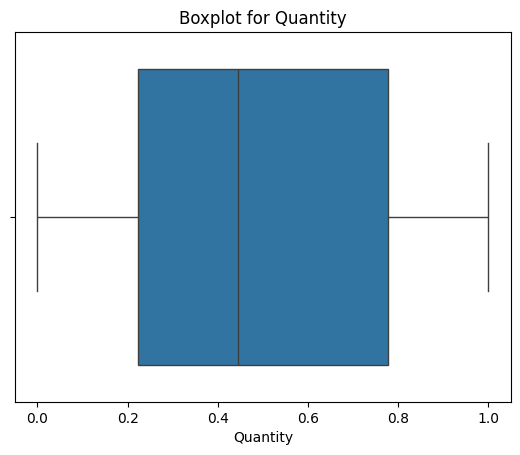

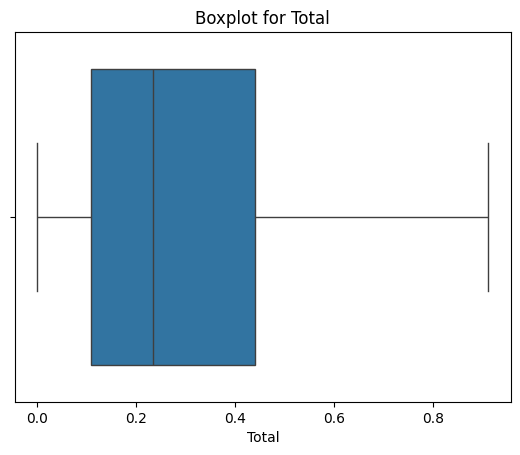

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_columns:
    sns.boxplot(x=df_ec[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

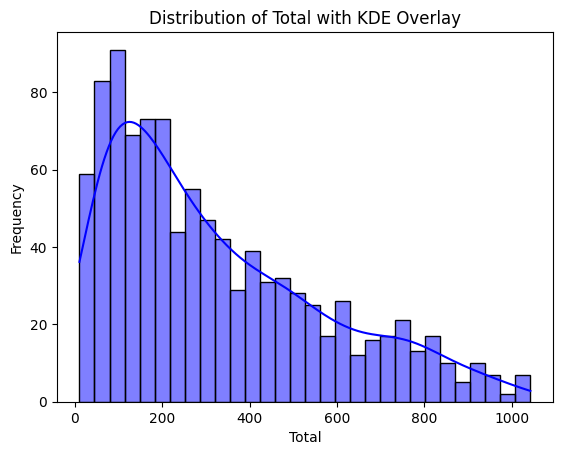

In [13]:
sns.histplot(df['Total'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total with KDE Overlay')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()


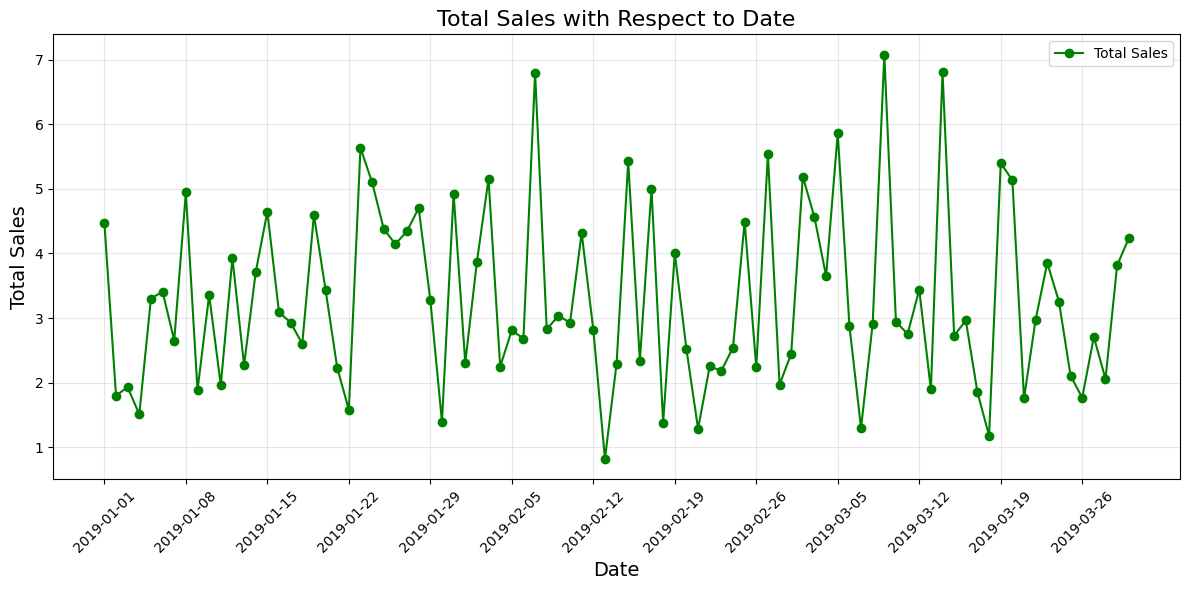

In [14]:
# Group data by Date and calculate total sales
daily_sales = df_ec.groupby('Date')['Total'].sum().reset_index()

# Plot the total sales with respect to date
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total'], marker='o', linestyle='-', color='g', label='Total Sales')

# Improve x-axis readability
plt.title('Total Sales with Respect to Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(daily_sales['Date'][::7], rotation=45)  # Show only every 7th date
plt.legend()
plt.tight_layout()
plt.show()


## **Perform Stationary tests** -> Checks if a time series is stationary, which is essential for accurate and reliable modeling in time-series analysis.

In [15]:
# A stationary time series is one where statistical properties like mean and variance don’t change over time. Many time-series models assume stationarity. The Augmented Dickey-Fuller (ADF) test checks this.
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result=adfuller(series,autolag='AIC')  #checks if the series is stationary
  print("ADF statistic:",result[0])
  print("p-value:",result[1]) # if the p value is less then 0.05 then the series is stationary
  print("Critical values")  # thresolds to compare with the adf statistics
  for key,value in result[4].items():
    print(f"{key}:{value}")
adf_test(df_ec['Total'])


ADF statistic: -30.465950105287014
p-value: 0.0
Critical values
1%:-3.436972562223603
5%:-2.864463856182476
10%:-2.5683268054280175


## Resampling

In [16]:
## Resampling adjusts the granularity of the time series (e.g., from monthly to daily). This is useful for aligning data to a desired time scale.
df_ec.index=pd.to_datetime(df_ec.index)
resampled_daily=df_ec['Total'].resample('D').sum()
print(resampled_daily.head())

Date
2019-01-01    4.473999
2019-01-02    1.802448
2019-01-03    1.930965
2019-01-04    1.511299
2019-01-05    3.302942
Freq: D, Name: Total, dtype: float64


##  visulisation of seasonal adjustment and decompostion

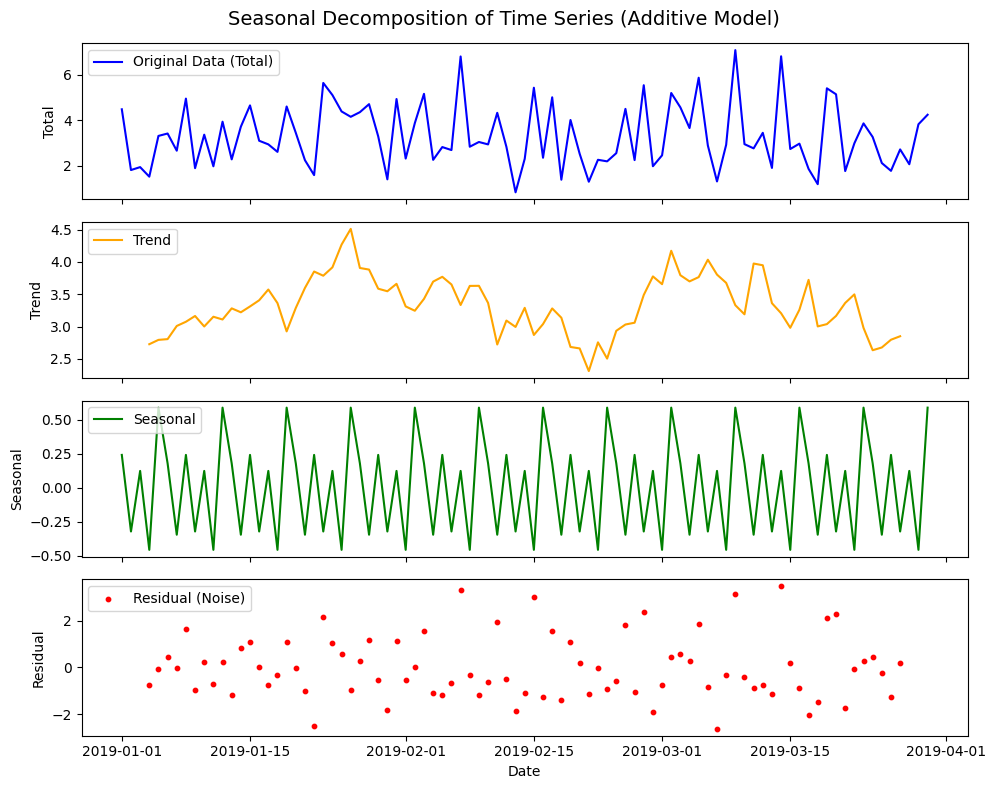

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform the decomposition
decomposition = seasonal_decompose(resampled_daily, model='additive', period=7)

# Create a clear and customized plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Plot each component with clearer labels
axes[0].plot(decomposition.observed, label='Original Data (Total)', color='blue')
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Total')

axes[1].plot(decomposition.trend, label='Trend', color='orange')
axes[1].legend(loc='upper left')
axes[1].set_ylabel('Trend')

axes[2].plot(decomposition.seasonal, label='Seasonal', color='green')
axes[2].legend(loc='upper left')
axes[2].set_ylabel('Seasonal')

axes[3].scatter(decomposition.resid.index, decomposition.resid, label='Residual (Noise)', color='red', s=10)
axes[3].legend(loc='upper left')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

# Add an overall title
plt.suptitle('Seasonal Decomposition of Time Series (Additive Model)', fontsize=14)
plt.tight_layout()
plt.show()



## trend/ seasonality removal

In [19]:
#Removing the trend and seasonality leaves the residuals, which often highlight anomalies or randomness.
# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
deseasonalized=resampled_daily-seasonal
detrended = resampled_daily - trend

In [20]:
print("Deseasonalized Data:")
print(deseasonalized.head())
print("Detrended Data:")
print(detrended.head())

Deseasonalized Data:
Date
2019-01-01    4.234076
2019-01-02    2.125177
2019-01-03    1.808824
2019-01-04    1.969048
2019-01-05    2.715725
Freq: D, dtype: float64
Detrended Data:
Date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04   -1.214996
2019-01-05    0.509579
Freq: D, dtype: float64


# time series encoding

In [21]:
df_ec['Lag_1'] = df_ec['Total'].shift(1)
df_ec['Lag_2'] = df_ec['Total'].shift(2)
df_ec['Lag_3'] = df_ec['Total'].shift(3)
# Time series encoding creates new features like lags and rolling averages to capture temporal dependencies.
df_ec['Rolling_Mean'] = df_ec['Total'].rolling(window=3).mean()


# correlation analysis

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

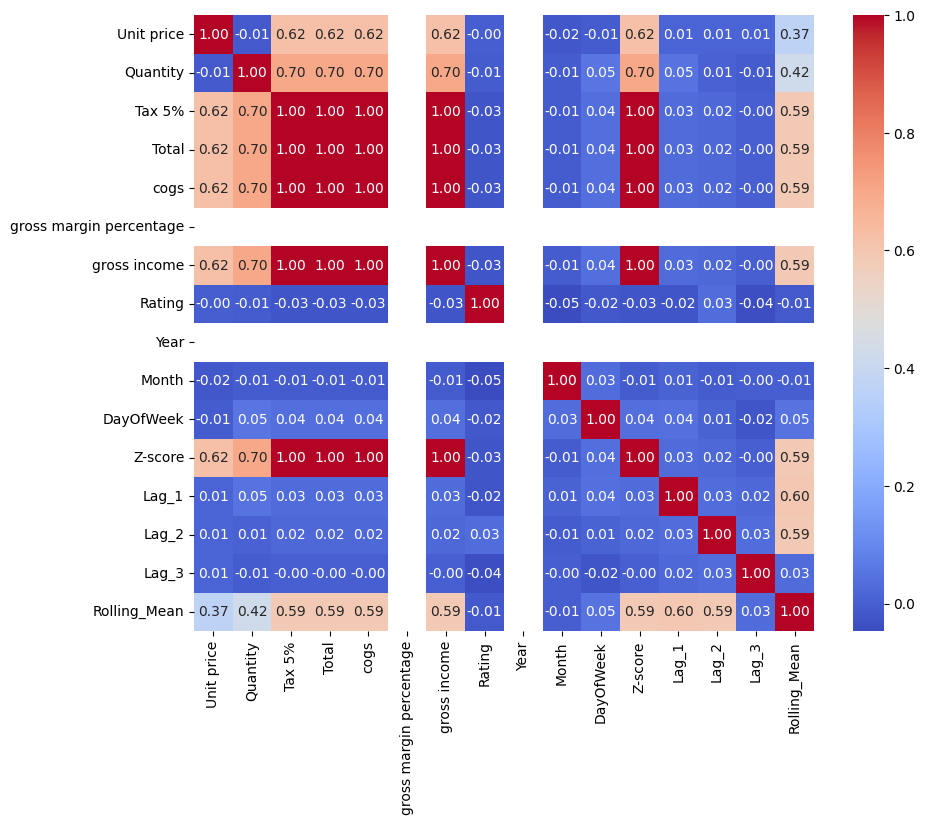

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns for correlation analysis
numerical_columns = df_ec.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numerical features
correlation_matrix = df_ec[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title


# scatter plots

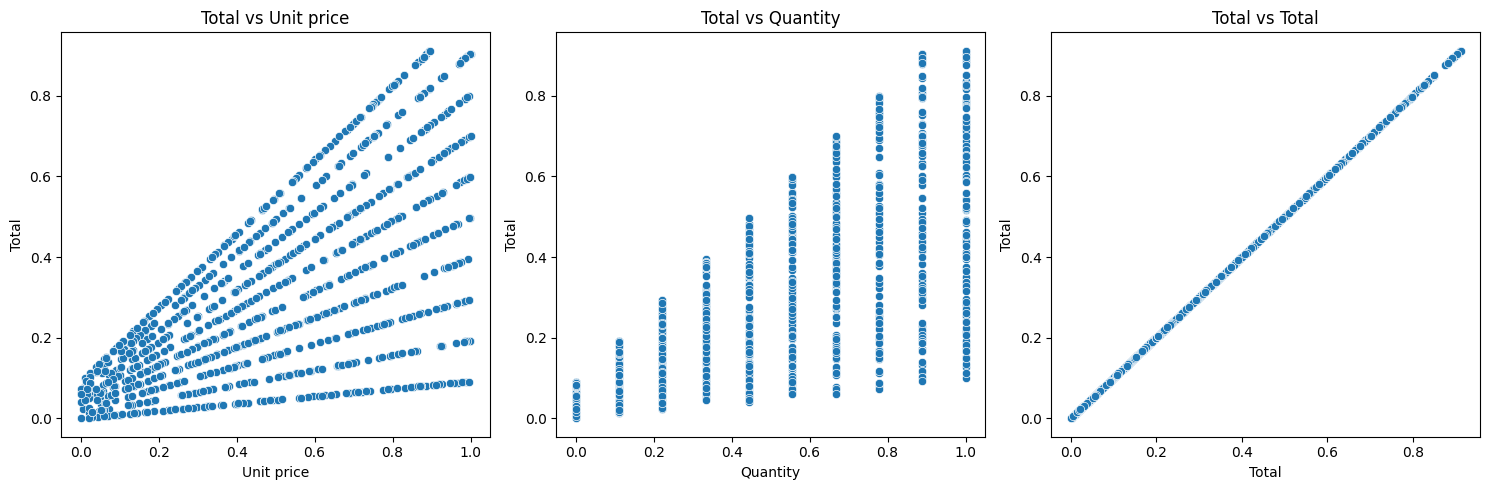

In [23]:
# Scatter plots for key relationships
numerical_features = ['Unit price', 'Quantity', 'Total']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.scatterplot(x=df_ec[feature], y=df_ec['Total'])
    plt.title(f'Total vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total')

plt.tight_layout()
plt.show()


#feature importance

In [28]:
X = df_ec.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
X =  X.drop(columns=['Total', 'Z-score'], errors='ignore') # Excluding identifiers and other non-predictive features
X = X.drop(columns=['InvoiceID', 'ProductID', 'CustomerID',
                    'Product line', 'Date', 'Time'], errors='ignore')  # Exclude categorical or non-predictive features
y = df_ec['Total']  # Target variable
print(X)


            Unit price  Quantity   Tax 5%    cogs  gross margin percentage  \
Date                                                                         
2019-01-05    0.718847  0.666667  26.1415  522.83                 4.761905   
2019-03-08    0.057855  0.444444   3.8200   76.40                 4.761905   
2019-03-03    0.403316  0.666667  16.2155  324.31                 4.761905   
2019-01-27    0.535603  0.777778  23.2880  465.76                 4.761905   
2019-02-08    0.848131  0.666667  30.2085  604.17                 4.761905   
...                ...       ...      ...     ...                      ...   
2019-02-18    0.565977  0.000000   3.0475   60.95                 4.761905   
2019-01-29    0.336782  0.000000   2.0175   40.35                 4.761905   
2019-02-09    0.242101  0.000000   1.5920   31.84                 4.761905   
2019-02-22    0.620160  0.000000   3.2910   65.82                 4.761905   
2019-02-18    0.870717  0.666667  30.9190  618.38               

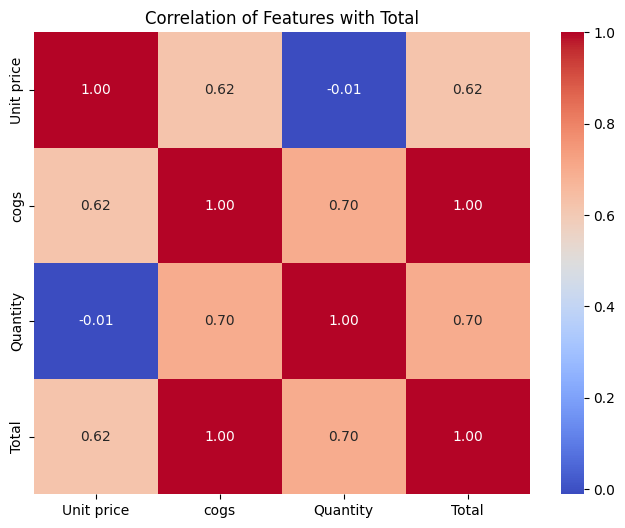

In [46]:
# Calculate correlation with the target (Total)
correlation_with_target = df_ec[['Unit price', 'cogs', 'Quantity', 'Total']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Features with Total")
plt.show()


## Model training and testing the model along with identifying the overfitting and underfitting


In [29]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #spliting  the model


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)  # make the predictions for training data
y_test_pred = model.predict(X_test) #make the predictons for testing data

# Calculate error metrics for training and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f"Training MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")

Training MAE: 0.00029446184420848056
Test MAE: 0.0008297820308362936
Training MSE: 2.446715127387097e-07
Test MSE: 3.1477272799942595e-06
Training R²: 0.9999952110653889
Test R²: 0.9999479850683806


# Cross valiidation before hyperparameter tunning

In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Print cross-validation results
print(f"Cross-validation MAE: {-cv_scores.mean()} (standard deviation: {cv_scores.std()})")


Cross-validation MAE: 0.0006719826841001352 (standard deviation: 8.685950815697254e-05)


##visualising the errors

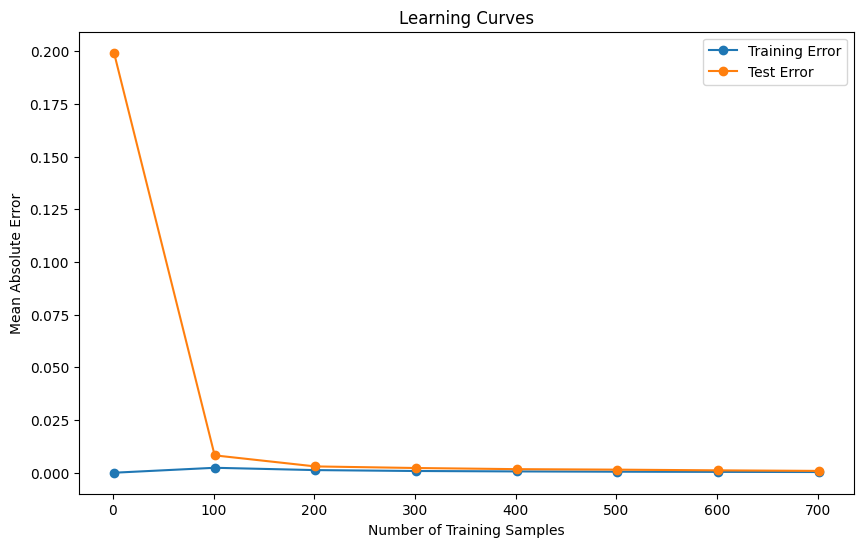

In [31]:
import matplotlib.pyplot as plt

# Plot learning curves (Training and Test Errors over different training sizes)
train_errors, test_errors = [], []

# Try training over increasing training set sizes
for m in range(1, len(X_train), 100):  # m is the number of samples used for training
    model.fit(X_train[:m], y_train[:m])
    train_errors.append(mean_absolute_error(y_train[:m], model.predict(X_train[:m])))
    test_errors.append(mean_absolute_error(y_test, model.predict(X_test)))

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train), 100), train_errors, label='Training Error', marker='o')
plt.plot(range(1, len(X_train), 100), test_errors, label='Test Error', marker='o')
plt.title("Learning Curves")
plt.xlabel("Number of Training Samples")
plt.ylabel("Mean Absolute Error")
plt.legend()
# plt.grid(True)
plt.show()





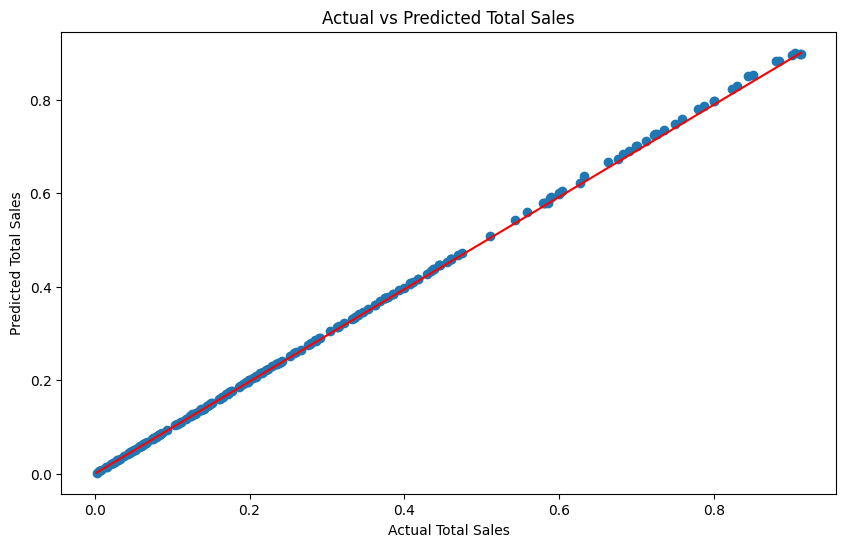

In [49]:
#visualizing the predicted vs actual values to assess model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales')
plt.show()

## hyperparameter tunning->checking the best parameter -randomizedsearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [3, 5, 10, None],
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='neg_mean_squared_error',
                                   cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)


# Training the model using regularized and best parameter so as to obtain best result

In [ ]:
# Initialize the model with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features=None,
    max_depth=10,
    random_state=42
)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

## checking for overfitting  and underfitting after tunning

In [35]:
# Train the model
best_rf_model.fit(X_train, y_train)

# Predictions for both training and test data
train_pred = best_rf_model.predict(X_train)
test_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics for training data
train_mae = mean_absolute_error(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Calculate evaluation metrics for test data
test_mae = mean_absolute_error(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

# Print evaluation metrics
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Training MAE: 0.0003945493570156111
Test MAE: 0.0009297083107379031
Training MSE: 4.274163409764983e-07
Test MSE: 4.242065571949055e-06
Training R^2: 0.9999916342164817
Test R^2: 0.9999299015667423


## cross-validation after hyperparamter tunning

In [36]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MAE: {-cv_scores.mean()}")
print(f"standard deviation: {cv_scores.std()}")

Cross-validation MAE: 1.782770423764995e-06
standard deviation: 4.843774526111208e-07


# visualising after regularization

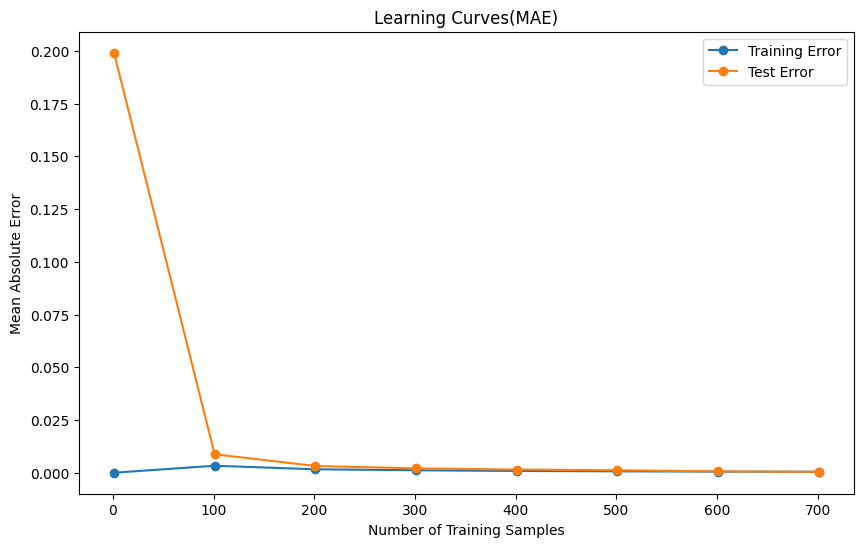

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Generate learning curve over increasing training sizes
for m in range(1, len(X_train), 100):  # Increment by 100 samples
    # Train the model on a subset of training data
    best_rf_model.fit(X_train[:m], y_train[:m])

    # Predict and calculate MAE for training subset and full test set
    train_errors.append(mean_absolute_error(y_train[:m], best_rf_model.predict(X_train[:m])))
    test_errors.append(mean_absolute_error(y_pred, best_rf_model.predict(X_test)))

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train), 100), train_errors, label='Training Error', marker='o')
plt.plot(range(1, len(X_train), 100), test_errors, label='Test Error', marker='o')
plt.title("Learning Curves(MAE)")
plt.xlabel("Number of Training Samples")
plt.ylabel("Mean Absolute Error")
plt.legend()
# plt.grid(True)
plt.show()






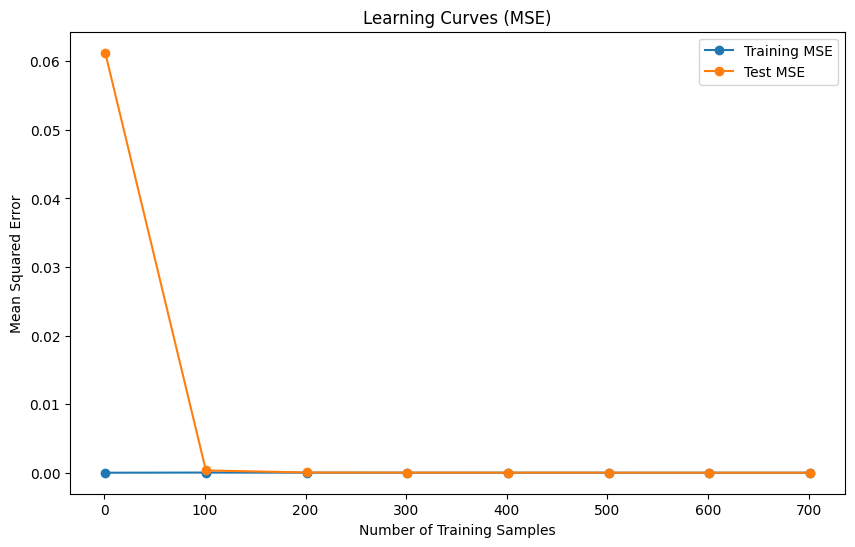

In [38]:
# Initialize lists to store training and test MSE
train_mse = []
test_mse = []

# Generate learning curve over increasing training sizes
for m in range(1, len(X_train), 100):  # Increment by 100 samples
    # Train the model on a subset of training data
    best_rf_model.fit(X_train[:m], y_train[:m])

    # Predict and calculate MSE for training subset and full test set
    train_mse.append(mean_squared_error(y_train[:m], best_rf_model.predict(X_train[:m])))
    test_mse.append(mean_squared_error(y_test, best_rf_model.predict(X_test)))

# Plot the learning curves for MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train), 100), train_mse, label='Training MSE', marker='o')
plt.plot(range(1, len(X_train), 100), test_mse, label='Test MSE', marker='o')
plt.title("Learning Curves (MSE)")
plt.xlabel("Number of Training Samples")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()
